<a href="https://colab.research.google.com/github/ruchisurya2002-maker/Analytics-Projects-/blob/main/Python_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q.1. Write a python program to perform menu driven program for following:

Accept number from user. • Display menu.

Factorial of number using Recursion

Multiplication of a table

Check if number is divisible by 7 • Select choice from user and display the result accordingly.

In [ ]:
def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)

def multiplication_table(n):
  for i in range(1, 11):
    print(f"{n} x {i} = {n*i}")

def divisible_by_7(n):
  if n % 7 == 0:
    return True
  else:
    return False

number = int(input("Enter a number: "))

print("\nMenu:")
print("1. Factorial of number using Recursion")
print("2. Multiplication of a table")
print("3. Check if number is divisible by 7")

choice = int(input("Enter your choice (1-3): "))

if choice == 1:
  print(f"The factorial of {number} is {factorial(number)}")
elif choice == 2:
  multiplication_table(number)
elif choice == 3:
  if divisible_by_7(number):
    print(f"{number} is divisible by 7")
  else:
    print(f"{number} is not divisible by 7")
else:
  print("Invalid choice")


Enter a number: 5

Menu:
1. Factorial of number using Recursion
2. Multiplication of a table
3. Check if number is divisible by 7
Enter your choice (1-3): 2
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
5 x 10 = 50


Q2. Perform EDA and Univariate, Bivariate and Multivariate Analysis using dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Sales data.csv')

we use pandas to load and read the data.

In [ ]:
# Show general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Product_ID,0
Sale_Date,0
Sales_Rep,0
Region,0
Sales_Amount,0
Quantity_Sold,0
Product_Category,0
Unit_Cost,0
Unit_Price,0
Customer_Type,0


is null is used to check missing values and there are no missing values

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

No duplicate rows

In [ ]:
# Display shape of the dataset
df.shape

(1000, 14)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']

# Summary statistics
df[numerical_cols].describe()

,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,100.120000,1.000000,60.280000,167.120000,0.00000
25%,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,9989.040000,49.000000,4995.300000,5442.150000,0.30000


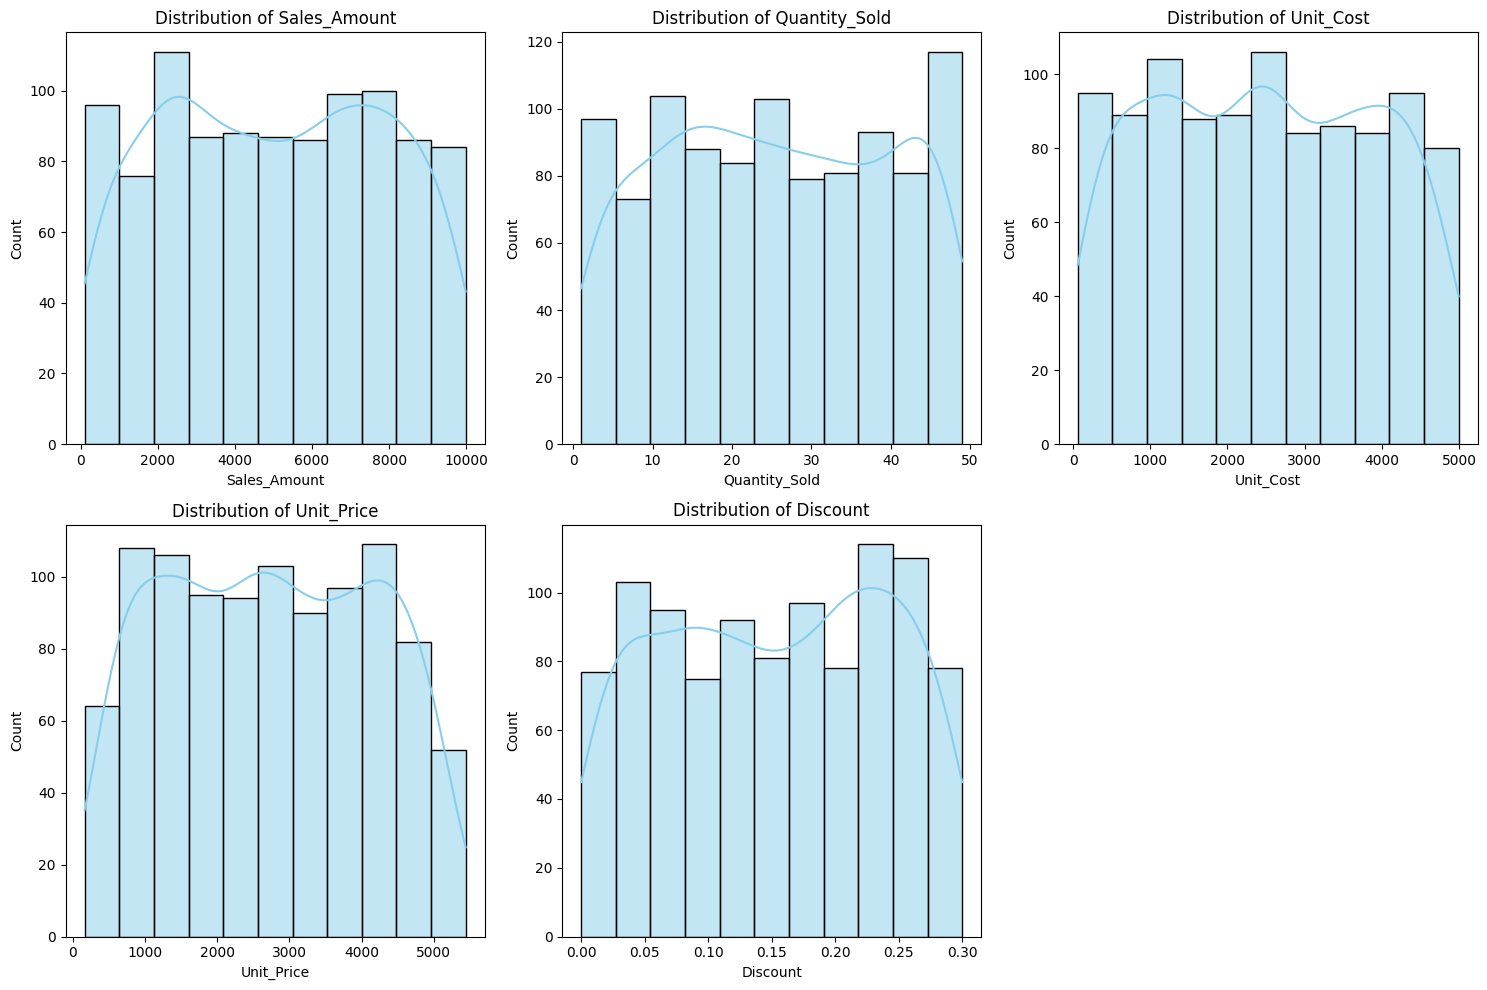

In [ ]:
# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


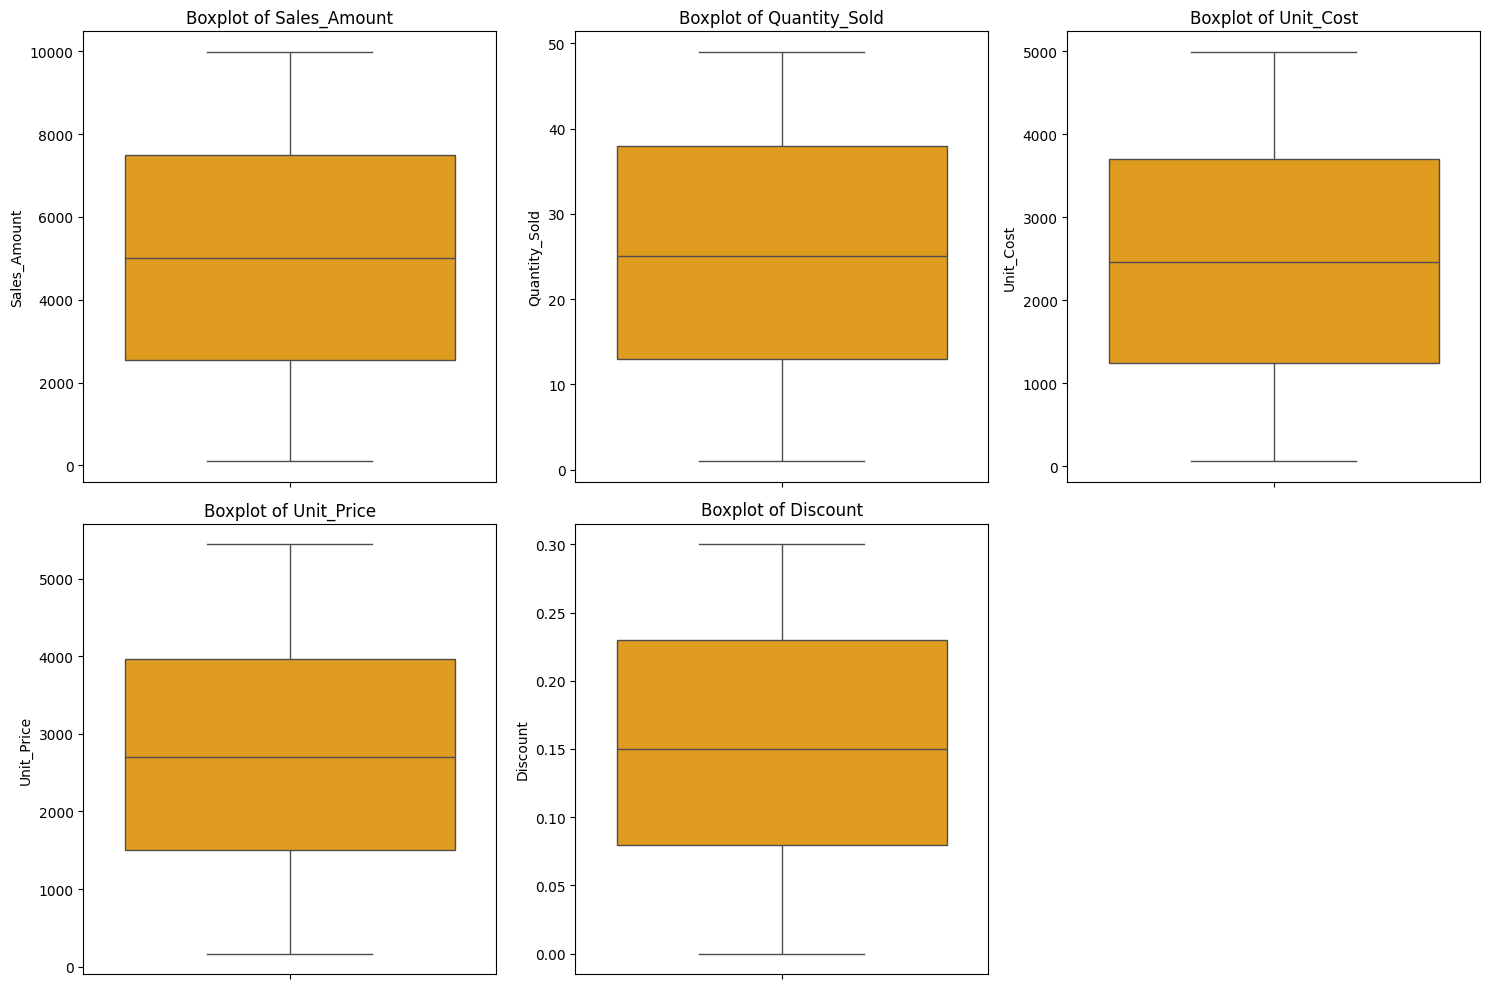

In [ ]:
# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<ipython-input-42-bffecc088345>:23: UserWarning: 
The palette list has fewer values (12) than needed (340) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, hue=col, palette=palette, legend=False)
<ipython-input-42-bffecc088345>:23: UserWarning: 
The palette list has fewer values (12) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, hue=col, palette=palette, legend=False)


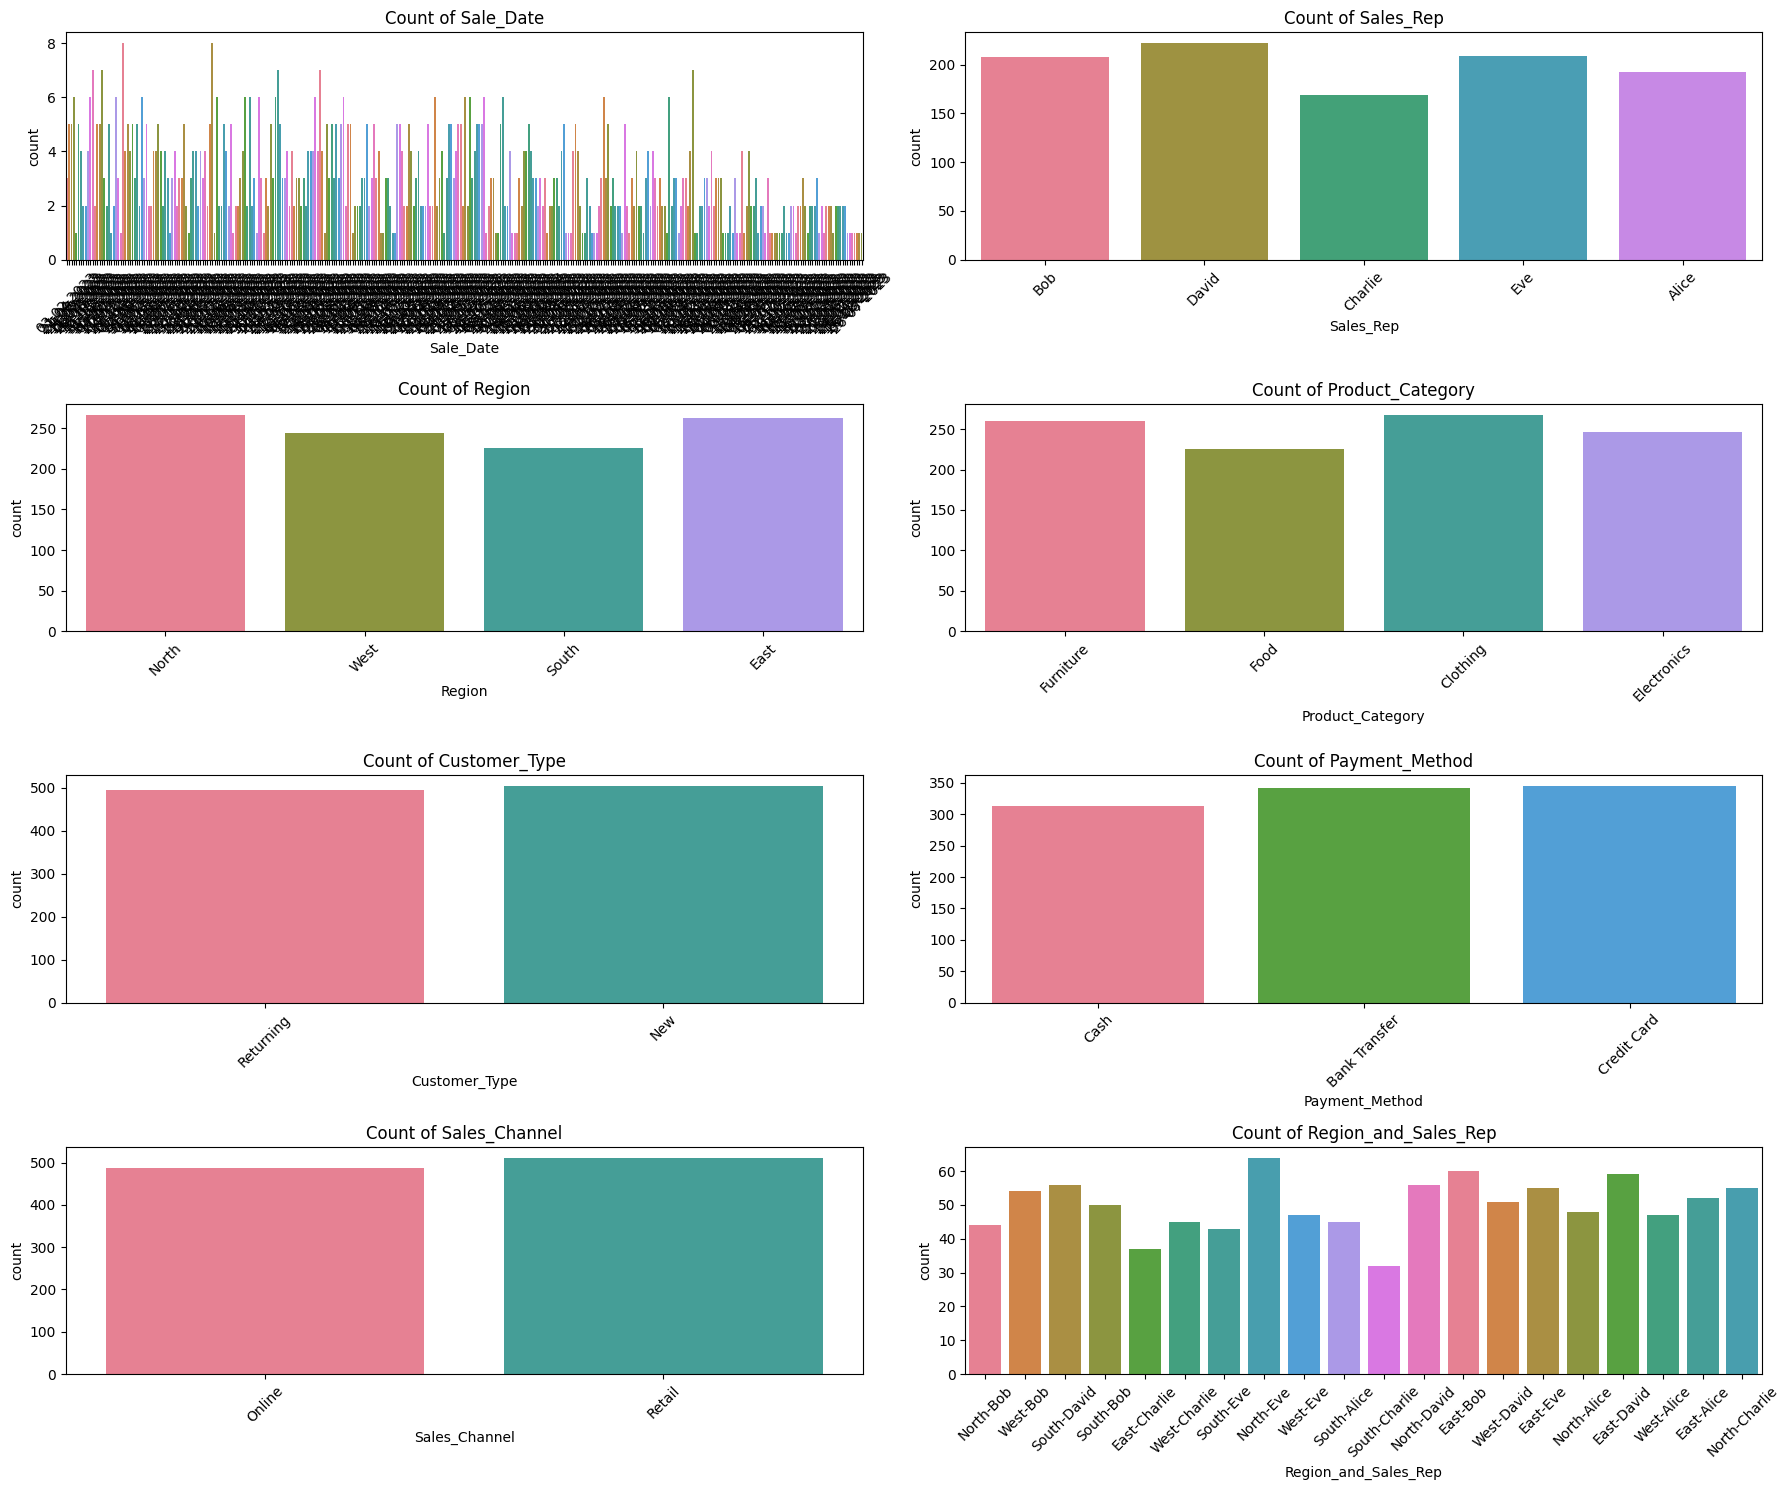

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns and exclude "Sales Date"
categorical_cols = [col for col in df.select_dtypes(include='object').columns if col.lower() != 'sales date']

# Adjust the subplot grid to accommodate all categorical columns
num_cols = len(categorical_cols)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed
                               # +1 ensures enough rows for odd number of columns
                               # // performs integer division

plt.figure(figsize=(18, 15))

for i, col in enumerate(categorical_cols):
    # Use num_rows and 2 for the subplot grid
    plt.subplot(num_rows, 2, i + 1)

    df[col] = df[col].astype(str)
    unique_vals = df[col].nunique()
    palette = sns.color_palette("husl", n_colors=min(unique_vals, 12))

    sns.countplot(data=df, x=col, hue=col, palette=palette, legend=False)

    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



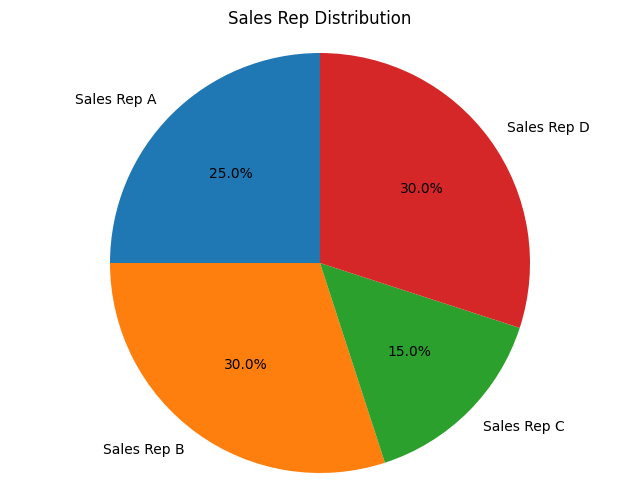

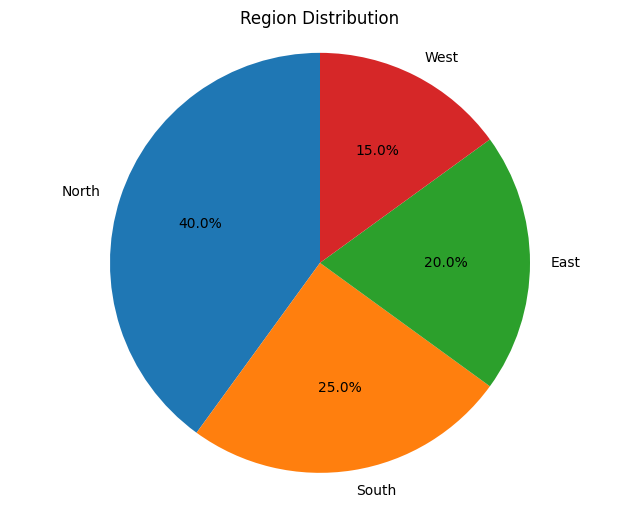

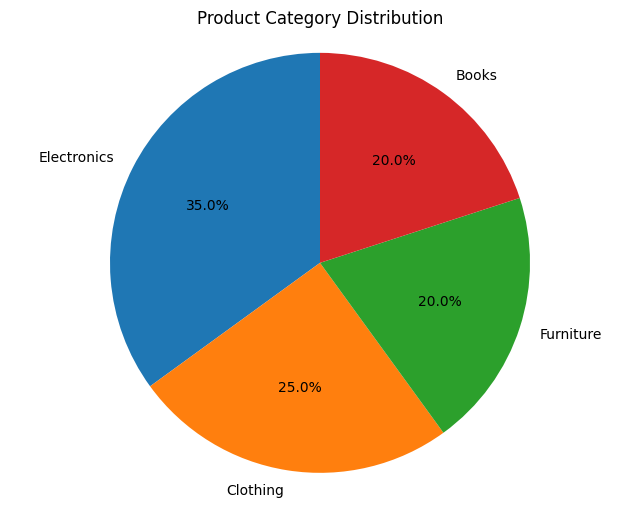

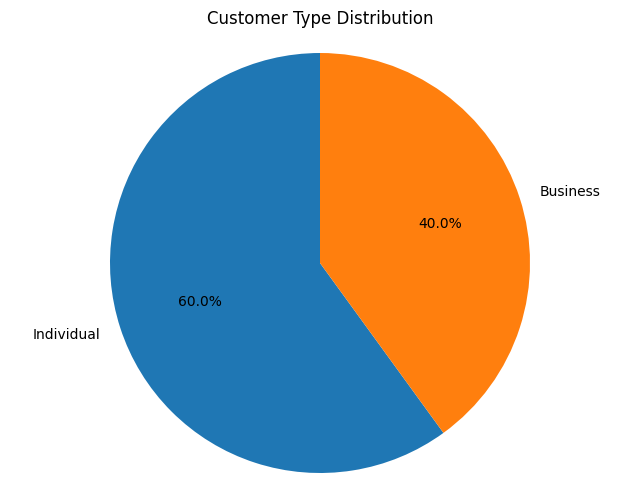

In [ ]:
# prompt: create pie chart for sales rep distrribution,region distribution,product category distribution,customer type distribution

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sales_rep_data = {'Sales Rep A': 25, 'Sales Rep B': 30, 'Sales Rep C': 15, 'Sales Rep D': 30}
region_data = {'North': 40, 'South': 25, 'East': 20, 'West': 15}
product_category_data = {'Electronics': 35, 'Clothing': 25, 'Furniture': 20, 'Books': 20}
customer_type_data = {'Individual': 60, 'Business': 40}

# Function to create a pie chart
def create_pie_chart(data, title):
    labels = list(data.keys())
    sizes = list(data.values())
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create pie charts
create_pie_chart(sales_rep_data, 'Sales Rep Distribution')
create_pie_chart(region_data, 'Region Distribution')
create_pie_chart(product_category_data, 'Product Category Distribution')
create_pie_chart(customer_type_data, 'Customer Type Distribution')


<ipython-input-44-0be70f5e6070>:11: UserWarning: 
The palette list has fewer values (12) than needed (340) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x=col, y='Sales_Amount', hue=col, palette=palette, dodge=False, legend=False)


ValueError: num must be an integer with 1 <= num <= 6, not 7

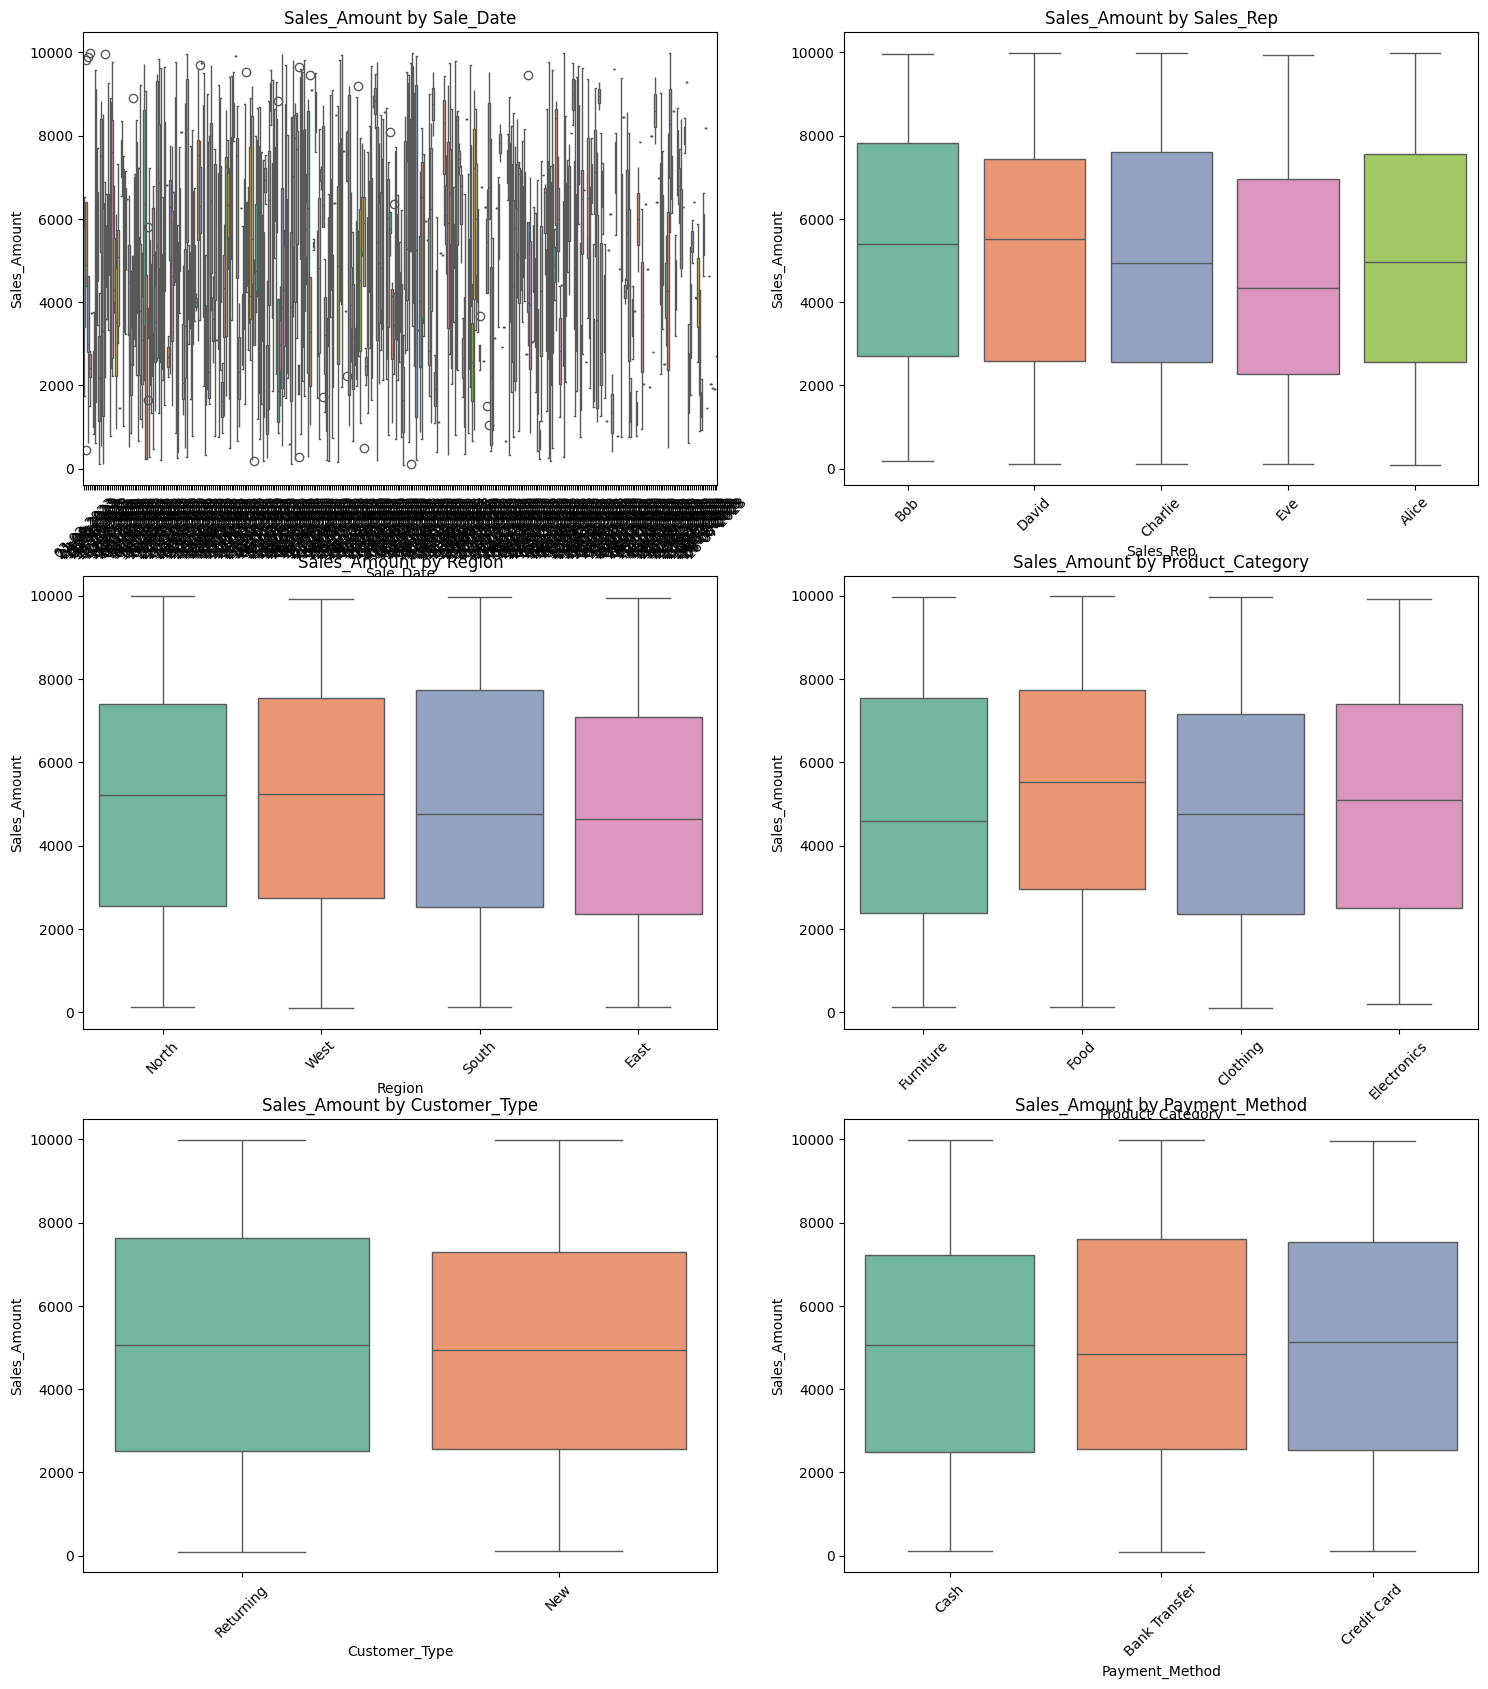

In [ ]:
plt.figure(figsize=(18, 20))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)

    df[col] = df[col].astype(str)
    unique_vals = df[col].nunique()
    palette = sns.color_palette("Set2", n_colors=min(12, unique_vals))  # safe limit

    # Set hue = x to apply palette without warning
    sns.boxplot(data=df, x=col, y='Sales_Amount', hue=col, palette=palette, dodge=False, legend=False)

    plt.title(f'Sales_Amount by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

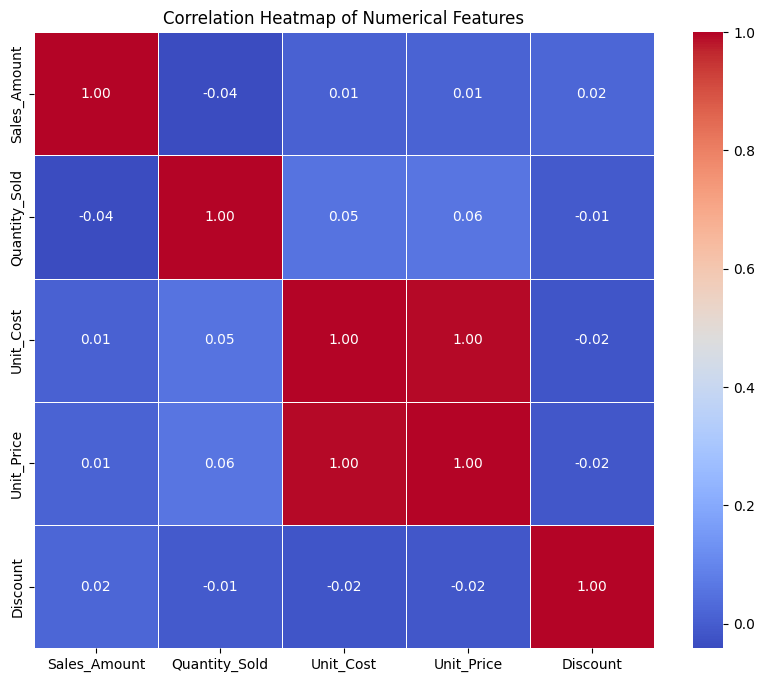

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


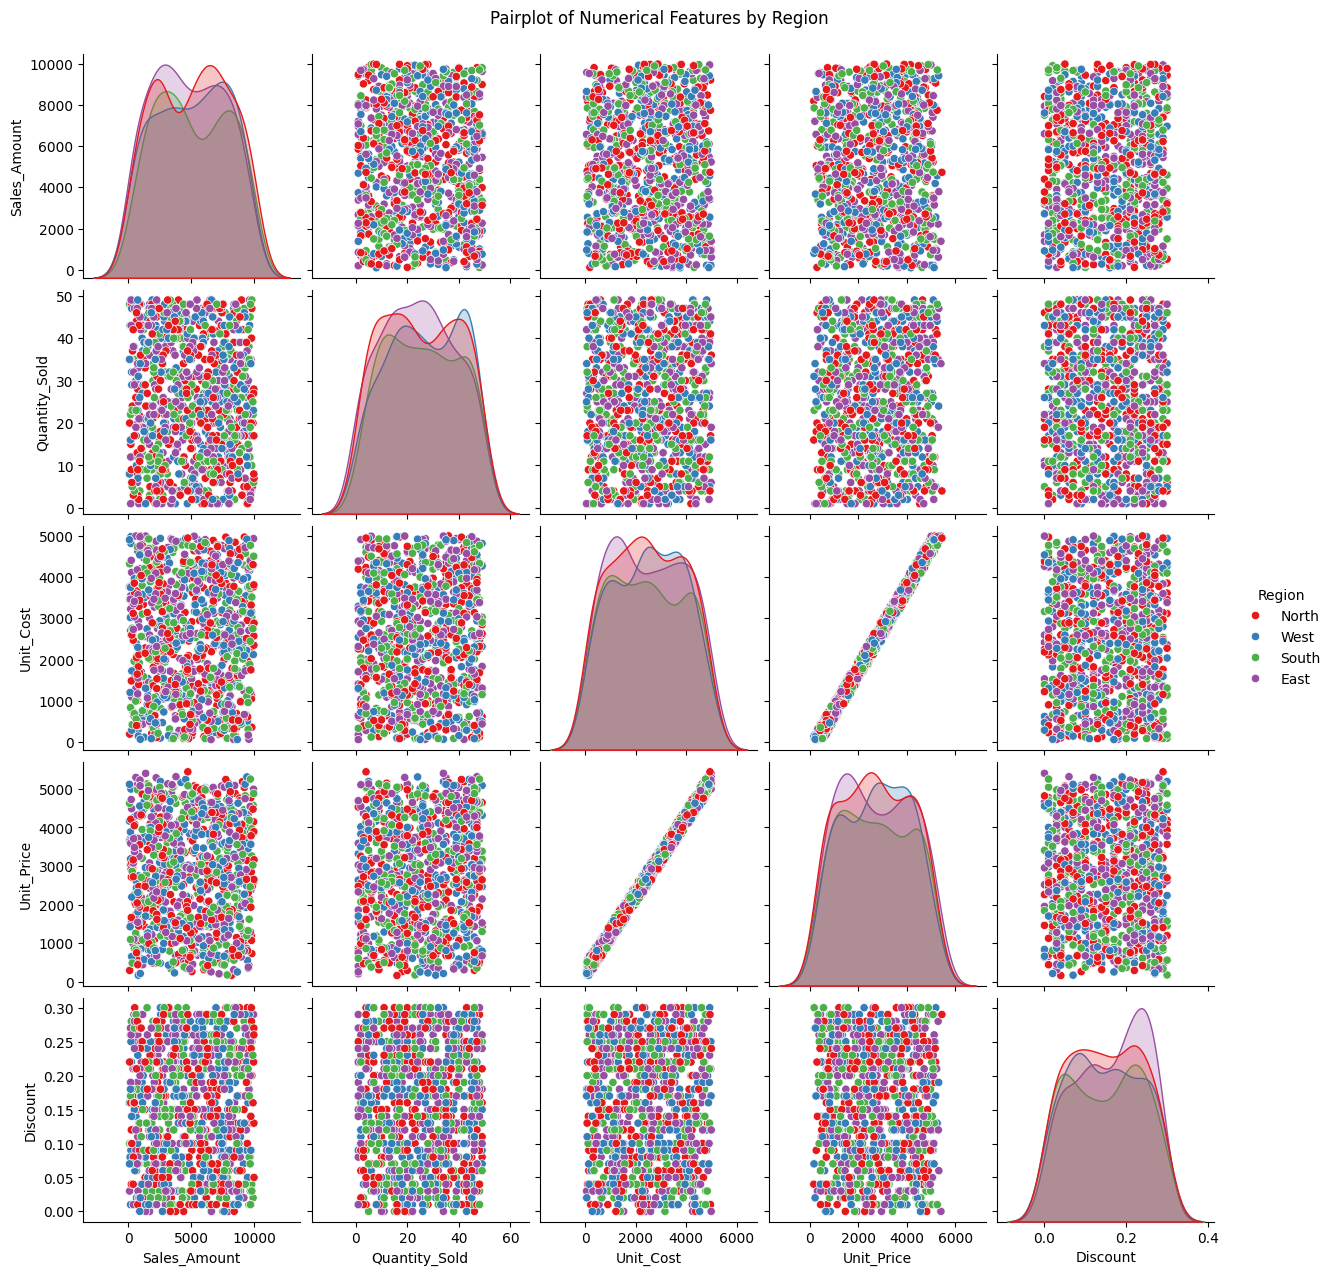

In [ ]:
sns.pairplot(df[numerical_cols + ['Region']], hue='Region', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features by Region", y=1.02)
plt.show()


In [ ]:
# Convert to datetime format
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], errors='coerce')

# Check for nulls (in case some dates failed conversion)
print(df['Sale_Date'].isnull().sum())


621


In [ ]:
# Extract useful time parts
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month
df['Day'] = df['Sale_Date'].dt.day
df['Weekday'] = df['Sale_Date'].dt.day_name()

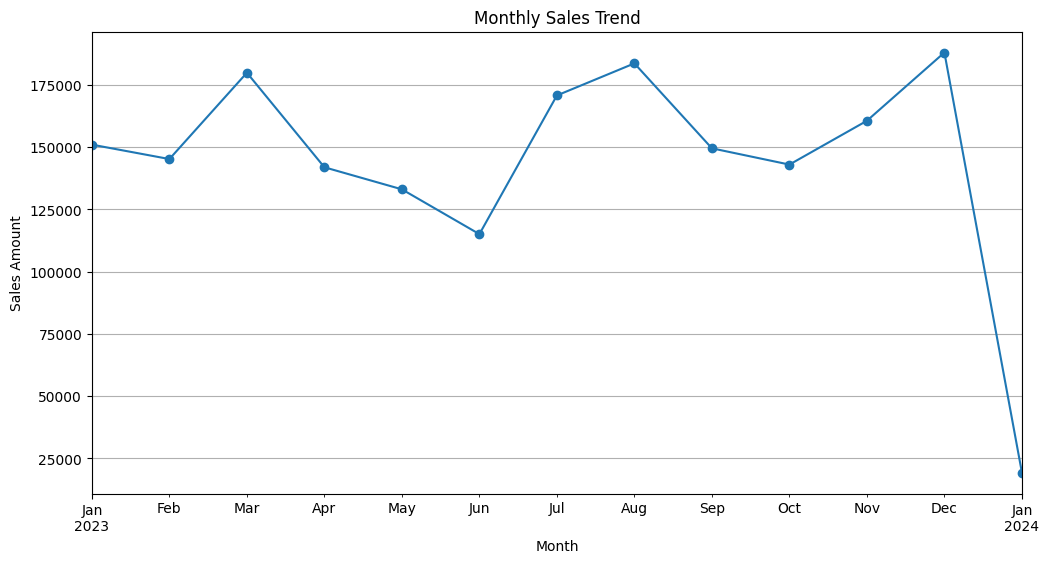

In [ ]:
# Group by month
monthly_sales = df.groupby(df['Sale_Date'].dt.to_period('M'))['Sales_Amount'].sum()

# Plot
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o', title='Monthly Sales Trend')
plt.ylabel("Sales Amount")
plt.xlabel("Month")
plt.grid(True)
plt.show()

<ipython-input-51-6ff612e66491>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Weekday', y='Sales_Amount', estimator='sum', palette='Set2')


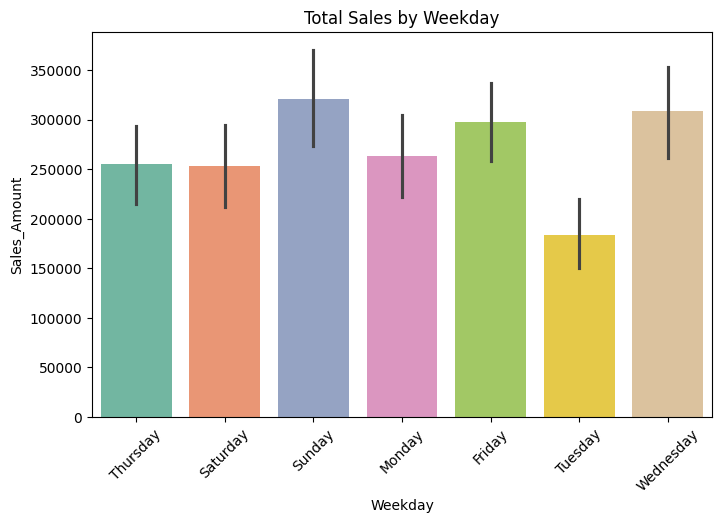

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Weekday', y='Sales_Amount', estimator='sum', palette='Set2')
plt.title("Total Sales by Weekday")
plt.xticks(rotation=45)
plt.show()

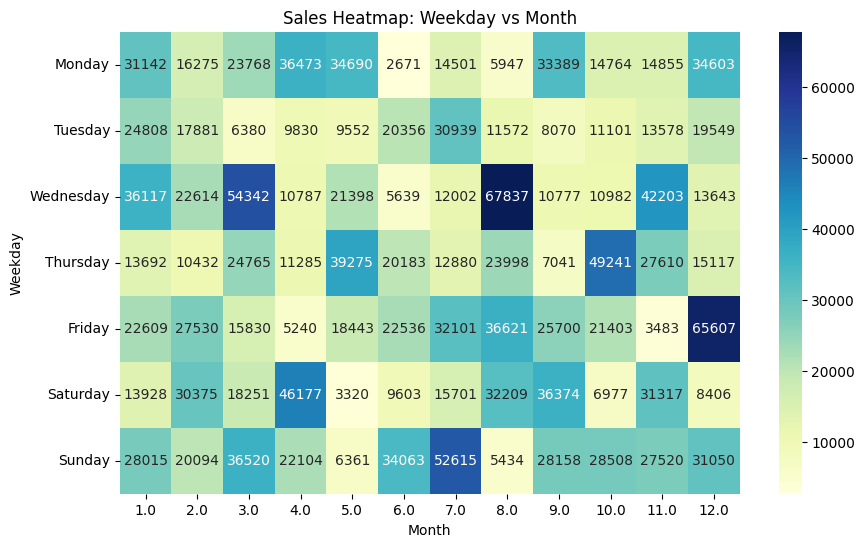

In [ ]:
pivot_table = df.pivot_table(values='Sales_Amount',
                             index='Weekday',
                             columns='Month',
                             aggfunc='sum')

# Reorder weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(order)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Sales Heatmap: Weekday vs Month")
plt.show()
